In [14]:
import pandas_datareader.data as web
import mplfinance as mpf

stock_code = '0050.tw'
savefig = 'savefig_path.png'
df = web.DataReader(stock_code, 'yahoo', '2020-07-01')

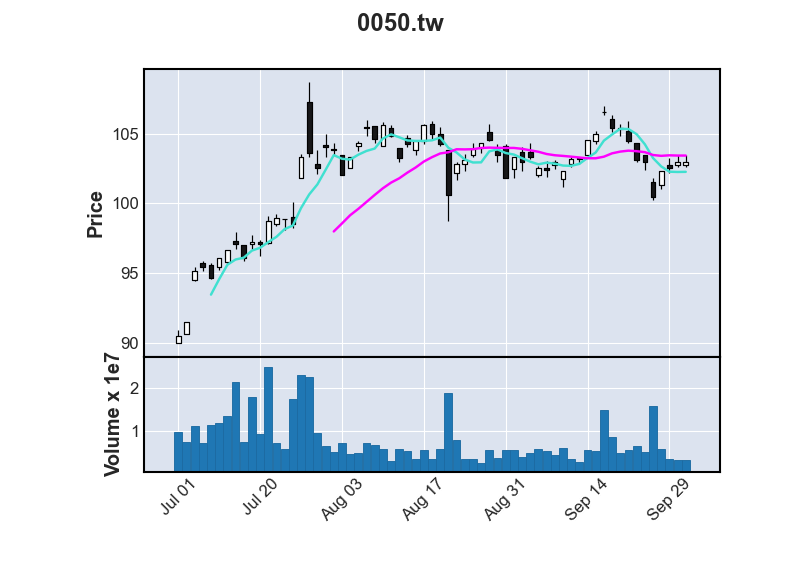

In [15]:
mpf.plot(df, type='candle', mav=(5,20), volume=True, title='\n{stock_code}'.format(stock_code=stock_code), savefig=savefig)

from IPython.display import Image
Image(savefig)

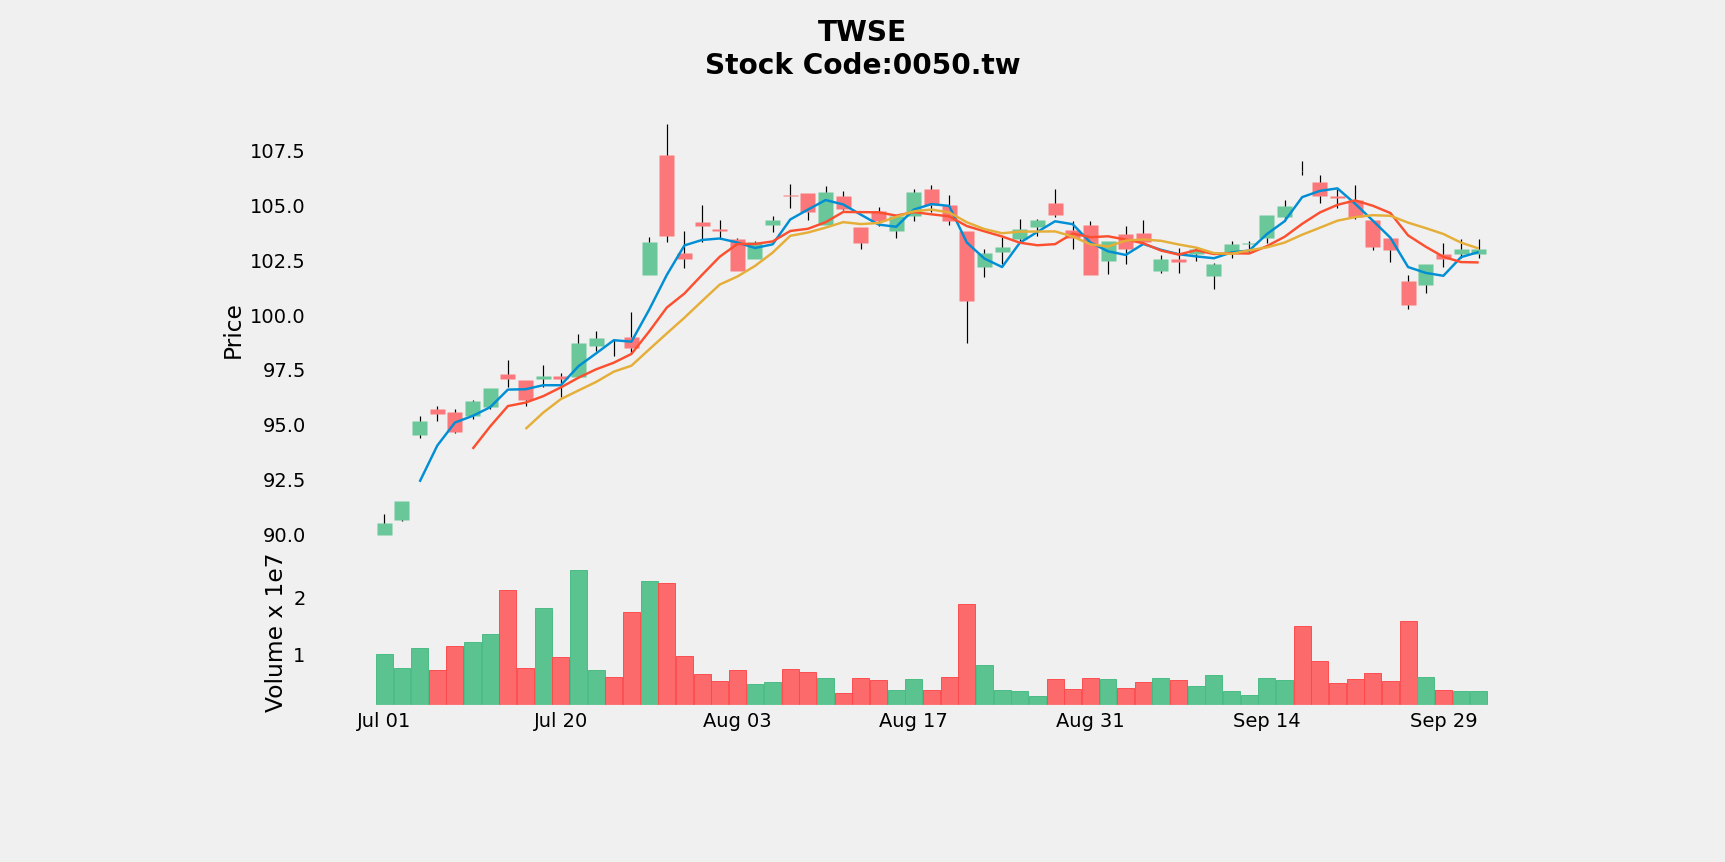

In [16]:
mc = mpf.make_marketcolors(up='#5ac390',down='#fd6a6c',volume='in',edge='None',)
s  = mpf.make_mpf_style(base_mpl_style='fivethirtyeight',gridstyle='None',marketcolors=mc)
mav=(3,6,9)
mpf.plot(df,
         type='candle',
         style=s,
         volume = True ,
         mav=mav,
         xrotation=0,
         panel_ratios=(3,1),
         figratio=(20,10),
         figscale=1.5,
         scale_width_adjustment = dict(lines=1),
         update_width_config = dict(candle_width = 0.85),
         title='\n\nTWSE\nStock Code:{}'.format(stock_code),
         savefig=savefig)

Image(savefig)

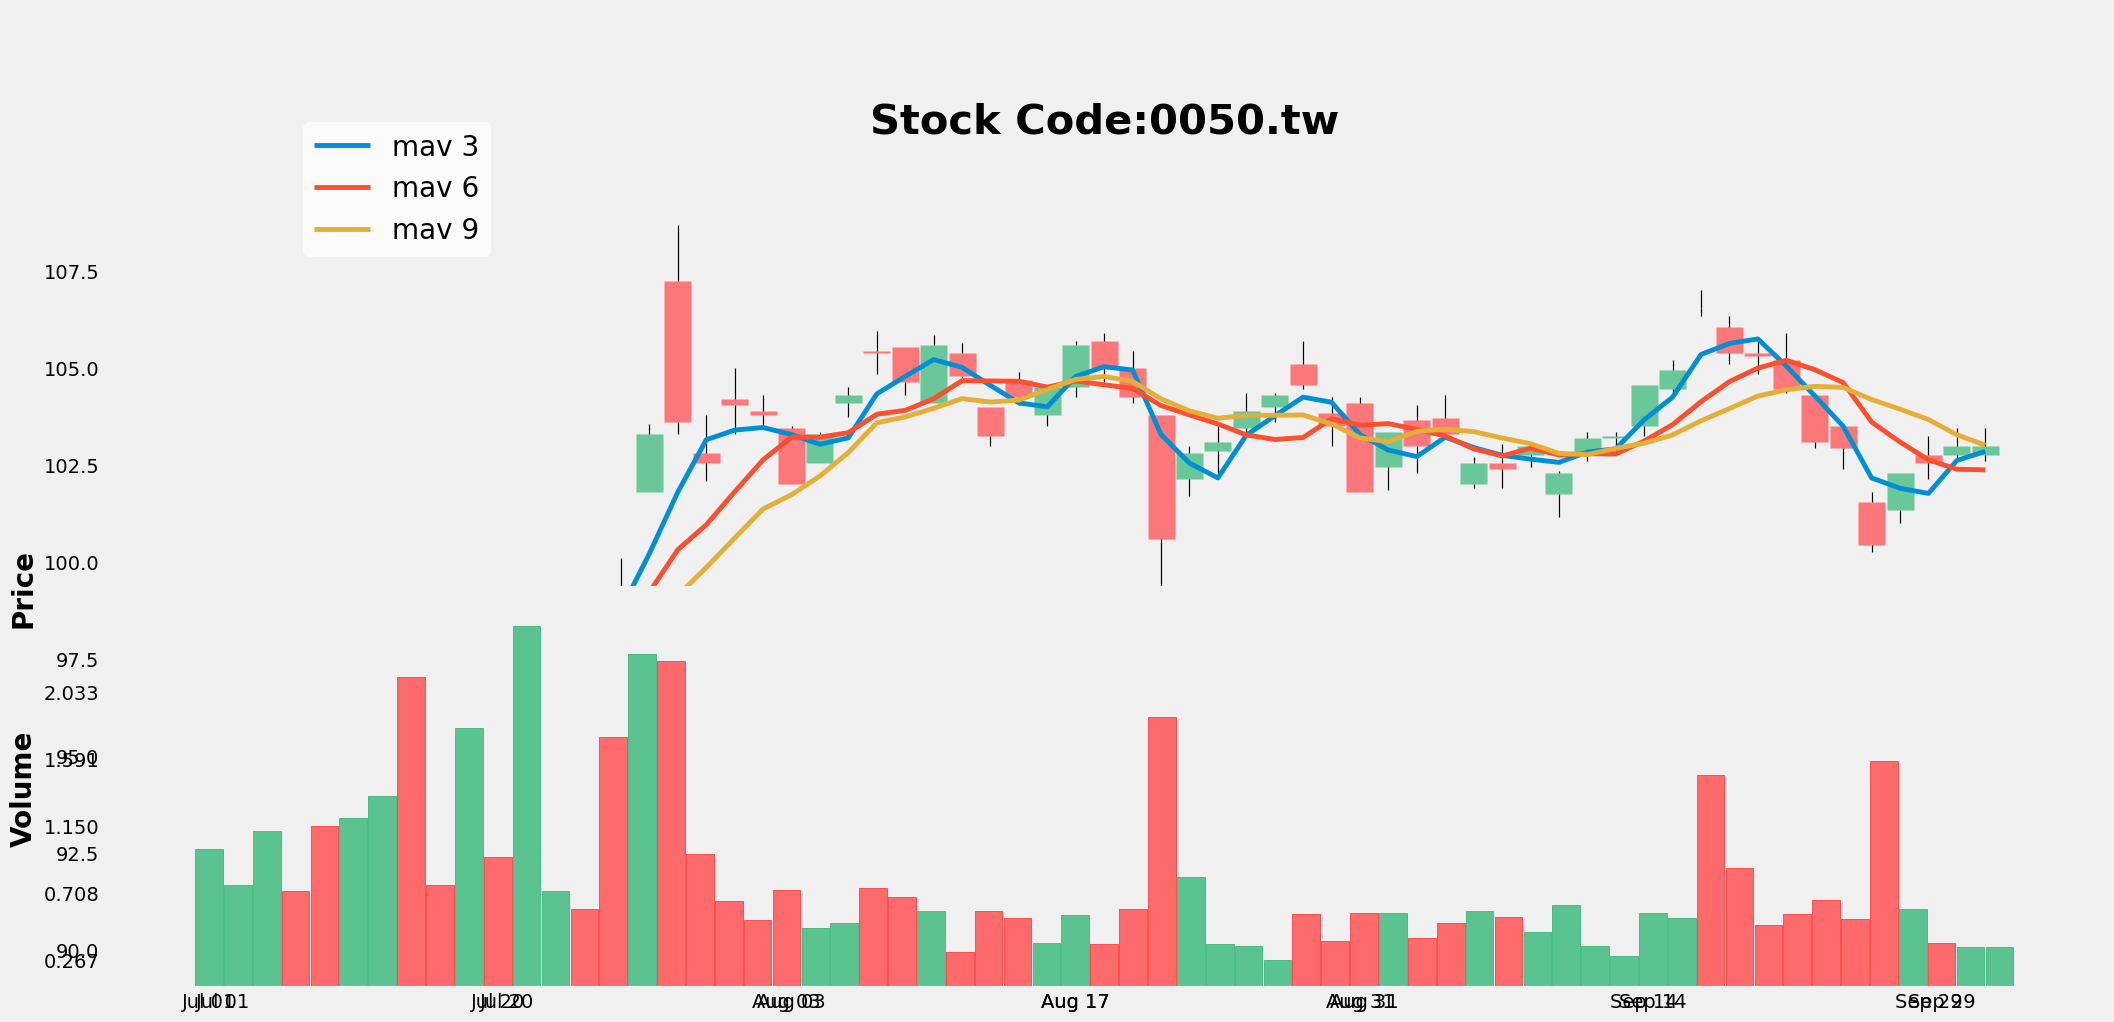

In [20]:
import matplotlib.pyplot as plt 
import numpy as np

mc = mpf.make_marketcolors(up='#5ac390',down='#fd6a6c',volume='in',edge='None',)
s  = mpf.make_mpf_style(base_mpl_style='fivethirtyeight',gridstyle='None',marketcolors=mc)

mc = mpf.make_marketcolors(up='#5ac390',down='#fd6a6c',volume='in',edge='None',)
s  = mpf.make_mpf_style(base_mpl_style='fivethirtyeight',gridstyle='None',marketcolors=mc)

exp12 = df['Close'].ewm(span=12, adjust=False).mean()
exp26 = df['Close'].ewm(span=26, adjust=False).mean()

macd = exp12 - exp26

signal    = macd.ewm(span=9, adjust=False).mean()
histogram = macd - signal

fig = plt.figure(figsize=(20,20))

ax1 = fig.add_axes([0,0,1,0.4])
ax2 = fig.add_axes([0,0,1,0.2])

mav = (3,6,9)
mpf.plot(df,
         type='candle',
         style=s,
         volume=ax2,
         mav=mav,
         panel_ratios=(4,1),
         xrotation=0,
         ax = ax1,
         update_width_config = dict(candle_width = 0.95),
         scale_width_adjustment = dict(lines=2))

ax1.legend(['mav '+str(mav[0]),'mav '+str(mav[1]),'mav '+str(mav[2])],
           loc='best', 
           bbox_to_anchor=(0.2, 1.1),
           fontsize = 20,
           frameon = True,
           edgecolor = 'w',
           facecolor = 'w')

ax1.set_title(
    label = '\n\nStock Code:{}\n'.format(stock_code),
    fontdict={'fontsize':30,
              'fontweight':'bold',
              'color':'k'},
    loc='center')

ax1.set_ylabel('Price',fontdict={'weight': 'bold', 'size': 20})
ax2.set_ylabel('Volume',fontdict={'weight': 'bold', 'size': 20})

ax1.yaxis.set_label_position("left")
ax1.yaxis.tick_left()

yticks = np.arange(min(df['Volume']), max(df['Volume']), round( (max(df['Volume']) - min(df['Volume']))/5 ))
ax2.set_yticks(yticks)

plt.savefig(savefig, dpi=300)

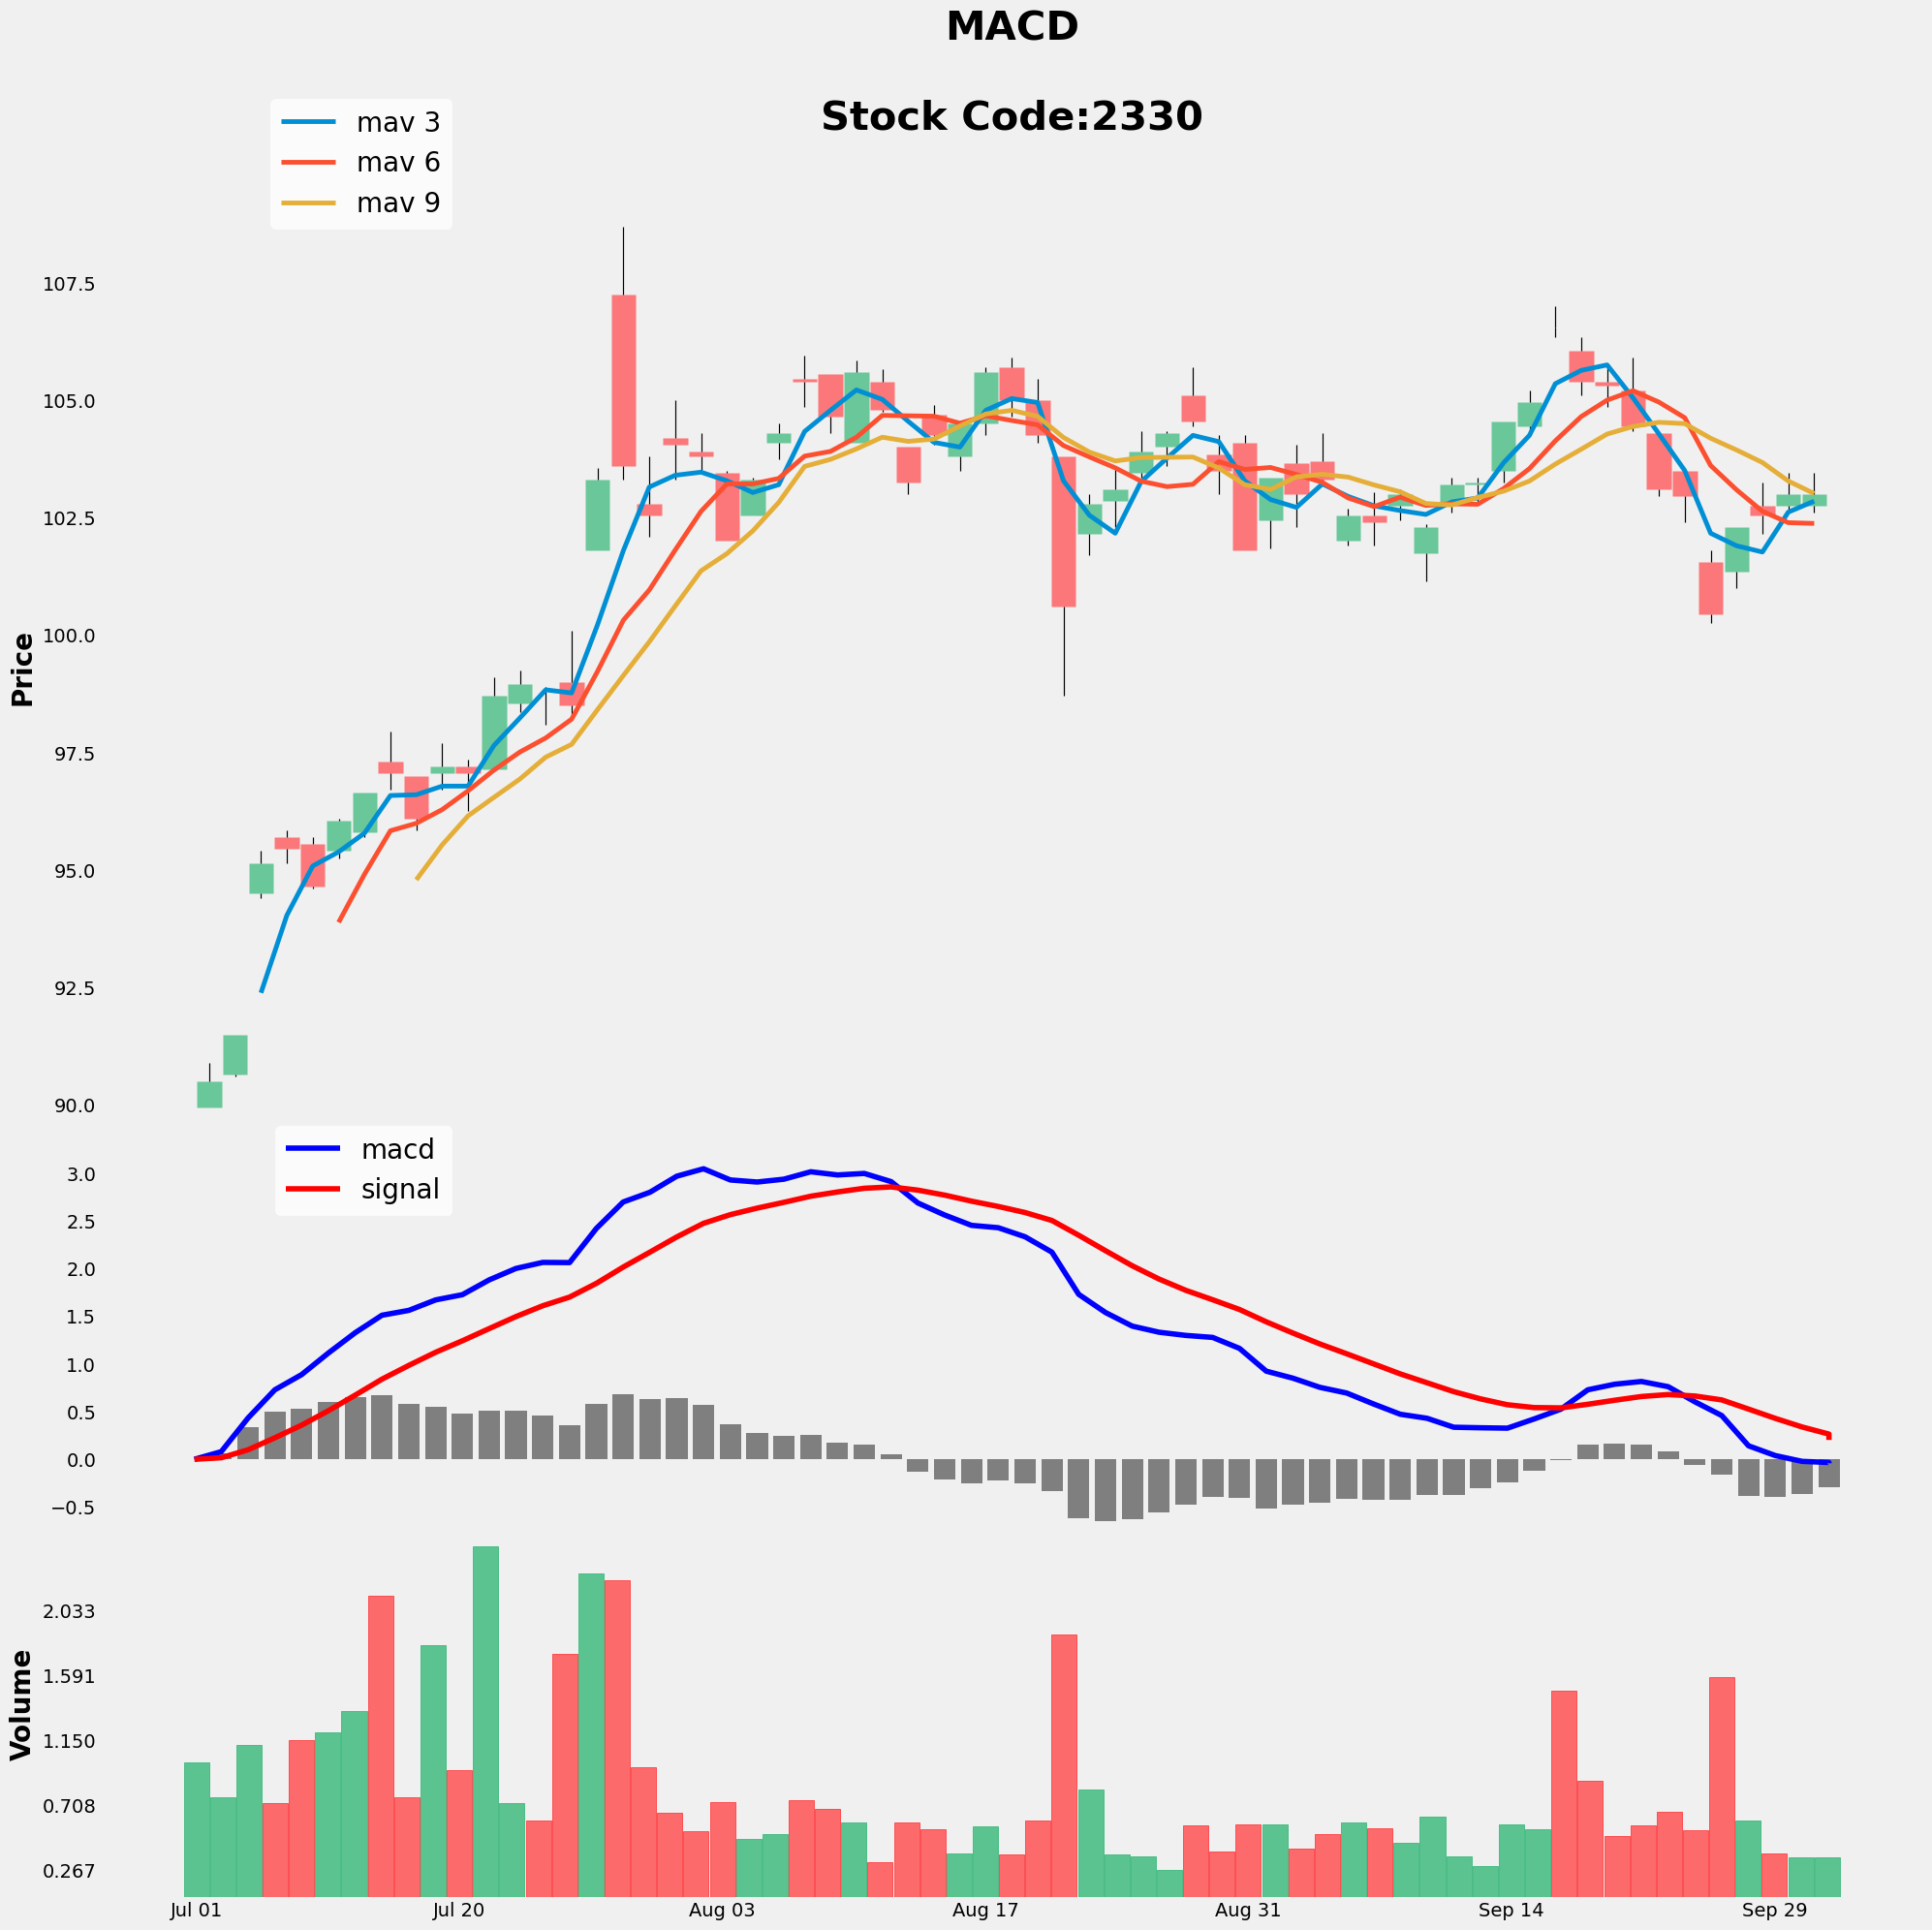

In [17]:
import matplotlib.pyplot as plt 
import numpy as np

mc = mpf.make_marketcolors(up='#5ac390',down='#fd6a6c',volume='in',edge='None',)
s  = mpf.make_mpf_style(base_mpl_style='fivethirtyeight',gridstyle='None',marketcolors=mc)

mc = mpf.make_marketcolors(up='#5ac390',down='#fd6a6c',volume='in',edge='None',)
s  = mpf.make_mpf_style(base_mpl_style='fivethirtyeight',gridstyle='None',marketcolors=mc)

exp12 = df['Close'].ewm(span=12, adjust=False).mean()
exp26 = df['Close'].ewm(span=26, adjust=False).mean()

macd = exp12 - exp26

signal    = macd.ewm(span=9, adjust=False).mean()
histogram = macd - signal

fig = plt.figure(figsize=(20,20))

ax1 = fig.add_axes([0.05,0.4,0.94,0.5])
ax2 = fig.add_axes([0.05,0.015,0.94,0.2])
ax3 = fig.add_axes([0.05,0.2,0.94,0.2])

strDate = [str(e).split(' ')[0] for e in df['Close'].index]
plt.bar(strDate, histogram, color = '#7f7f7f')
plt.plot(strDate, macd, color = 'b')
plt.plot(strDate, signal, color = 'r')

mav = (3,6,9)
mpf.plot(df,
         type='candle',
         style=s,
         volume=ax2,
         mav=mav,
         panel_ratios=(4,1),
         xrotation=0,
         ax = ax1,
         update_width_config = dict(candle_width = 0.95),
         scale_width_adjustment = dict(lines=2))
ax1.legend(['mav '+str(mav[0]),'mav '+str(mav[1]),'mav '+str(mav[2])],
           loc='best', 
           bbox_to_anchor=(0.2, 1.1),
           fontsize = 20,
           frameon = True,
           edgecolor = 'w',
           facecolor = 'w')
ax3.legend(['macd','signal'],
           loc='best', 
           bbox_to_anchor=(0.2, 1.1),
           fontsize = 20,
           frameon = True,
           edgecolor = 'w',
           facecolor = 'w')
ax1.set_title(
    label = 'MACD\n\nStock Code:2330\n',
    fontdict={'fontsize':30,
              'fontweight':'bold',
              'color':'k'},
    loc='center')
ax1.set_ylabel('Price',fontdict={'weight': 'bold', 'size': 20})
ax2.set_ylabel('Volume',fontdict={'weight': 'bold', 'size': 20})
ax1.yaxis.set_label_position("left")
ax1.yaxis.tick_left()
yticks = np.arange(min(df['Volume']), max(df['Volume']), round( (max(df['Volume']) - min(df['Volume']))/5 ))
ax2.set_yticks(yticks)
ax1.set_xticks([])
ax3.set_xticks([])
ax1.set(frame_on=False)
ax2.set(frame_on=False)
ax3.set(frame_on=False)
plt.savefig(savefig, dpi=300)